<a href="https://colab.research.google.com/github/HongTuoi02/NguyenHongTuoi20104071/blob/main/Nhan_dang_do_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food/

/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [16]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 360 images belonging to 6 classes.


In [17]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 30 images belonging to 6 classes.


In [18]:
train_set.class_indices

{'Banh mi': 0,
 'Banh tet': 1,
 'Banh xeo': 2,
 'Ca kho': 3,
 'Chao': 4,
 'Hu tieu': 5}

In [19]:
test_set.class_indices

{' Ca kho': 0,
 'Banh mi': 1,
 'Banh tet': 2,
 'Banh xeo': 3,
 'Chao': 4,
 'Hu tieu': 5}

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

In [21]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
12/12 [==============================] - 31s 3s/step - loss: 7.0490 - accuracy: 0.1694 - val_loss: 1.8743 - val_accuracy: 0.2000
Epoch 2/100
12/12 [==============================] - 13s 1s/step - loss: 1.7471 - accuracy: 0.1750 - val_loss: 1.7925 - val_accuracy: 0.2000
Epoch 3/100
12/12 [==============================] - 14s 1s/step - loss: 1.5981 - accuracy: 0.3667 - val_loss: 2.3623 - val_accuracy: 0.1333
Epoch 4/100
12/12 [==============================] - 13s 1s/step - loss: 1.4329 - accuracy: 0.4139 - val_loss: 1.8288 - val_accuracy: 0.2000
Epoch 5/100
12/12 [==============================] - 13s 1s/step - loss: 1.3886 - accuracy: 0.4694 - val_loss: 2.1290 - val_accuracy: 0.3000
Epoch 6/100
12/12 [==============================] - 13s 1s/step - loss: 1.4207 - accuracy: 0.4000 - val_loss: 1.7109 - val_accuracy: 0.2000
Epoch 7/100
12/12 [==============================] - 14s 1s/step - loss: 1.3560 - accuracy: 0.4694 - val_loss: 2.1879 - val_accuracy: 0.2333
Epoch 8/100
1

In [22]:
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Nhan_dang_do_an.h5')

In [23]:
model_doan = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Nhan_dang_do_an.h5')

In [24]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.4022265076637268
Train Accuracy 0.8694444298744202


1/1 [==============================] - 0s 78ms/step
Ca kho


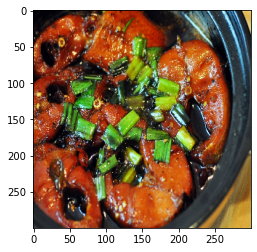

1/1 [==============================] - 0s 19ms/step
Ca kho


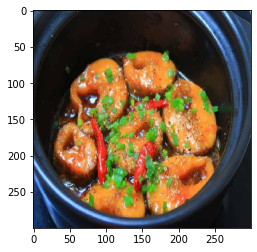

1/1 [==============================] - 0s 17ms/step
Banh mi


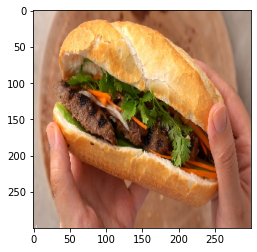

1/1 [==============================] - 0s 16ms/step
Banh mi


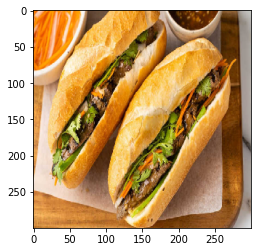

1/1 [==============================] - 0s 19ms/step
Banh tet


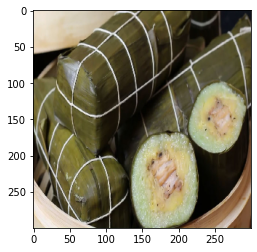

1/1 [==============================] - 0s 17ms/step
Banh tet


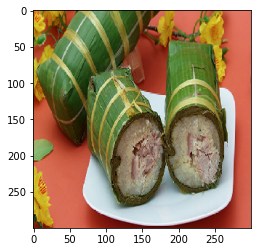

1/1 [==============================] - 0s 16ms/step
Banh xeo


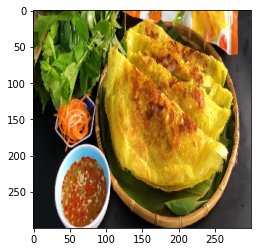

1/1 [==============================] - 0s 18ms/step
Banh xeo


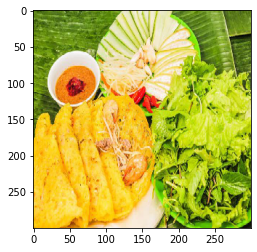

1/1 [==============================] - 0s 16ms/step
Chao


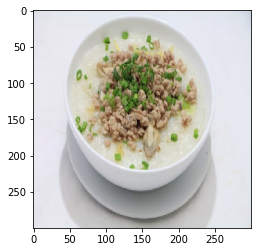

1/1 [==============================] - 0s 19ms/step
Chao


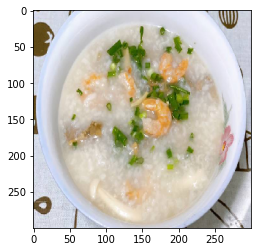

1/1 [==============================] - 0s 16ms/step
Ca kho


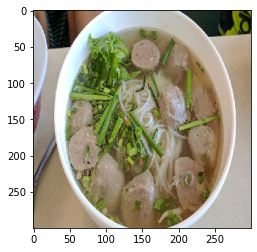

1/1 [==============================] - 0s 16ms/step
Hu tieu


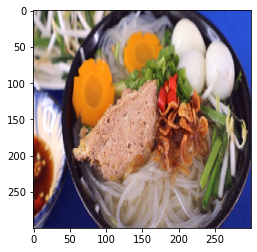

In [25]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_doan.predict(img)
  if round(result[0][0])==1:
    prediction='Banh mi'
  if round(result[0][1])==1:
    prediction = 'Banh tet'
  if round(result[0][2])==1:
    prediction='Banh xeo'
  if round(result[0][3])==1:
    prediction='Ca kho'
  if round(result[0][4])==1:
    prediction='Chao'
  if round(result[0][5])==1:
    prediction='Hu tieu'
  print(prediction)
  plt.show()